# Predicting the Price of a Used Toyota in the UK

This notebook will be used to predict the price of a used car based on multiple variables. I was originally interested in this dataset because my family owns four Toyotas, with the last one being purchased used. If I had made this model before we made this purchase, it would have given us a better idea of what price was fair for the Rav-4 given the different features it had. Right before we purchased the used RAV-4, we sold a used 2002 Highlander. Unfortunately, since this data was collected in the United Kingdom (where Highlanders are not sold), so predicting the price of a used Highlander could not be done.

Although the data was collected in a completely different market (that of the United Kingdom), it could be adjusted to fit the United States market. In the future, a model to bridge the gap between the market in the United States and the United Kingdom could be tested. Also, finding data on other features, like color, number of failed inspections, leather interior, etc. could make the model more precise. 


### Source:
The dataset was downloaded from:
* https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes?select=toyota.csv

### Data:
The dataset contains information on multiple variables about the used cars including:
1. Model
2. Year
3. Price (pound)
4. Type of Transmission
5. Mileage
6. Type of Fuel
7. Tax (pound)
8. Miles per Gallon
9. Engine Size (liters)

### Structure of project:
The model will follow the same steps as that found in a Udemy course about the prices of Bulldozers:
* https://github.com/jbschnee/zero-to-mastery-ml/blob/master/section-3-structured-data-projects/end-to-end-bluebook-bulldozer-price-regression-video.ipynb

Also, I took some aspects of these models for my own model:
* https://www.kaggle.com/vivinbarath/audi-car-price-prediction-with-r-2-0-97
* https://www.kaggle.com/adityadesai13/audi-car-price-prediction-model-score-0-96

In [1]:
# Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('fivethirtyeight')
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
# Importing dataset
df = pd.read_csv("/Users/joey/Downloads/datasets_750216_1305559_toyota.csv")

## Data Exploration

In [3]:
# Quick glimpse of our data
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [4]:
# Quick data description
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


**Things to keep in mind:**
* Mean price of the vehicles: £12,522.
* Median price of the vehicles: £10,795.
* When the mean is greater than the median, this means that the dataset is right skewed.
* We will see this later in our histogram, qqplot and box plot.

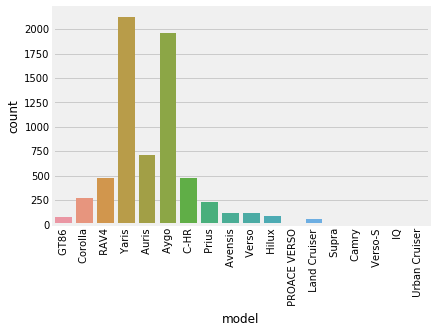

In [5]:
# Bar graph on fuel type
ax = sns.countplot(df.model, label = "Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

There are around 500 RAV-4's in this dataset, so if I were to predict a reasonable price for the RAV-4 we recently purchased, this dataset would be helpful. The price of the Highlander we just sold, however, could not be predicted because the UK does not have a market for Highlanders.

In [6]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


**Notice the three objects... we will have to take care of that later.**

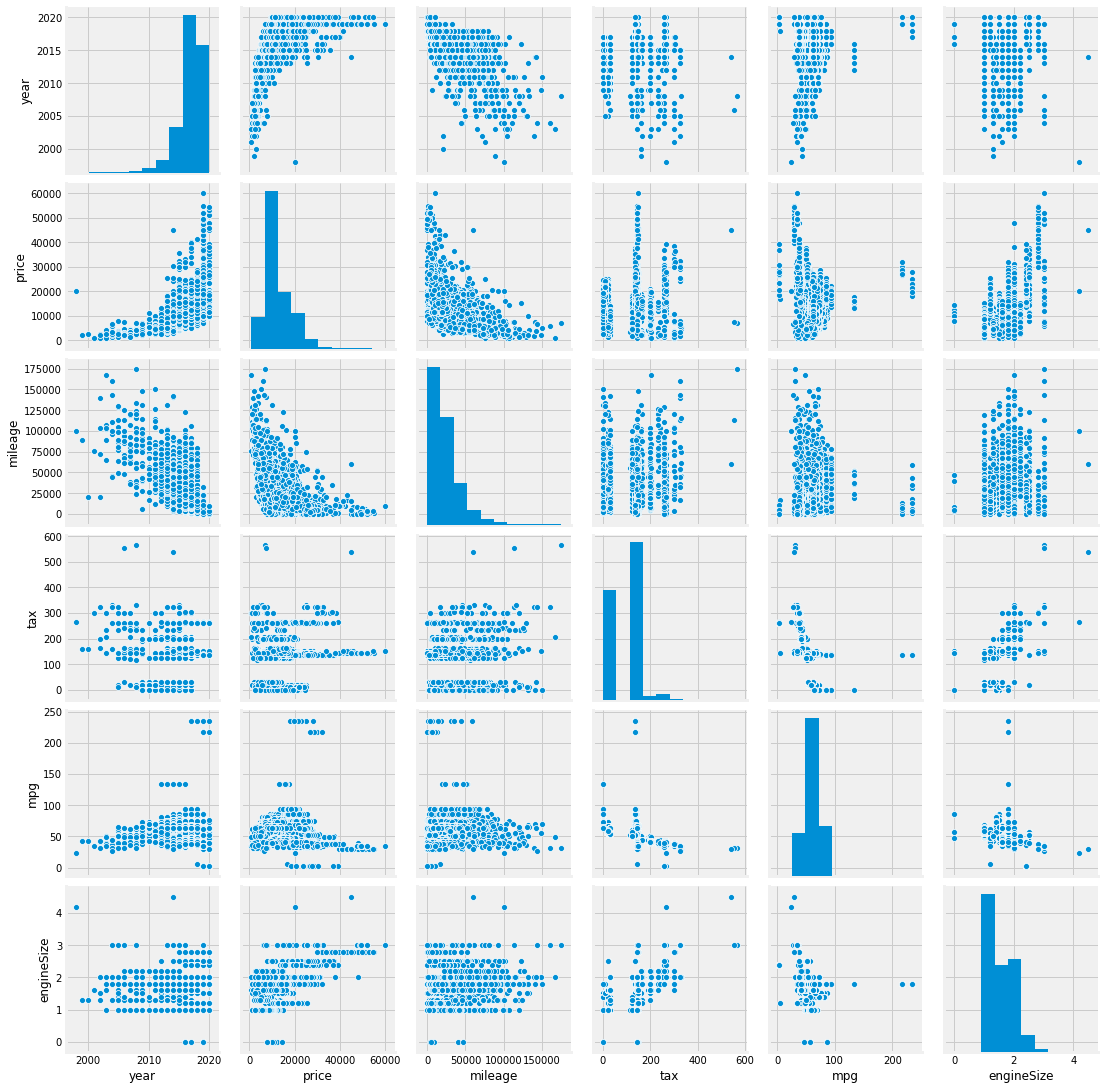

In [7]:
# Pairplotting to view some patterns
sns.pairplot(df)
plt.show()

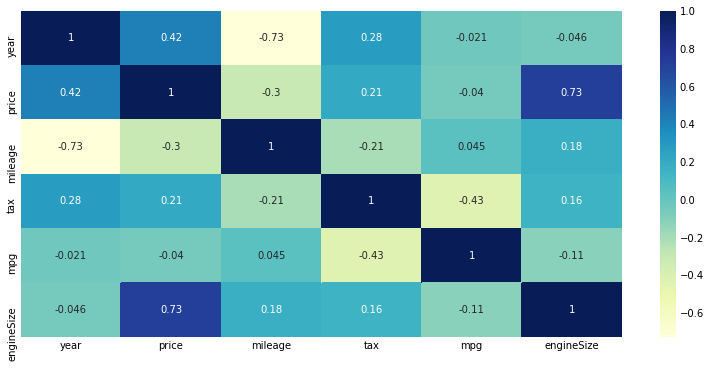

In [8]:
# The correlations between the features displayed on a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")
plt.show()

In [9]:
# Do we have null values?
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

**Since the dataset was clean when we received it, there is no need to fill null values.**

In [10]:
# Making a copy of our data for evaluation
df_tmp = df.copy()

## Feature Engineering

We are now going to make the three object columns (`model`, `transmission`, and `fuelType`) dummy variables in order to visualize the dataset better. We will make a histogram, a qqplot, and a boxplot with `price` as our independent variable. The levels of skewness and kurtosis will be calculated for better evaluation.

In [11]:
# turning model, transmission, and fuelType into dummy variables
data_onehot = pd.get_dummies(df_tmp,columns=['model', 'transmission','fuelType'])
data_onehot.head(3)

,year,price,mileage,tax,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2016,16000,24089,265,36.2,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2017,15995,18615,145,36.2,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2015,13998,27469,265,36.2,2.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [12]:
# function to create histogram, qqplot, and boxplot.
def plotting_3_chart(df_tmp, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df_tmp.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df_tmp.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df_tmp.loc[:,feature], orient='v', ax = ax3 );

Skewness: 1.8167427530241373
Kurtosis: 5.810489225799944


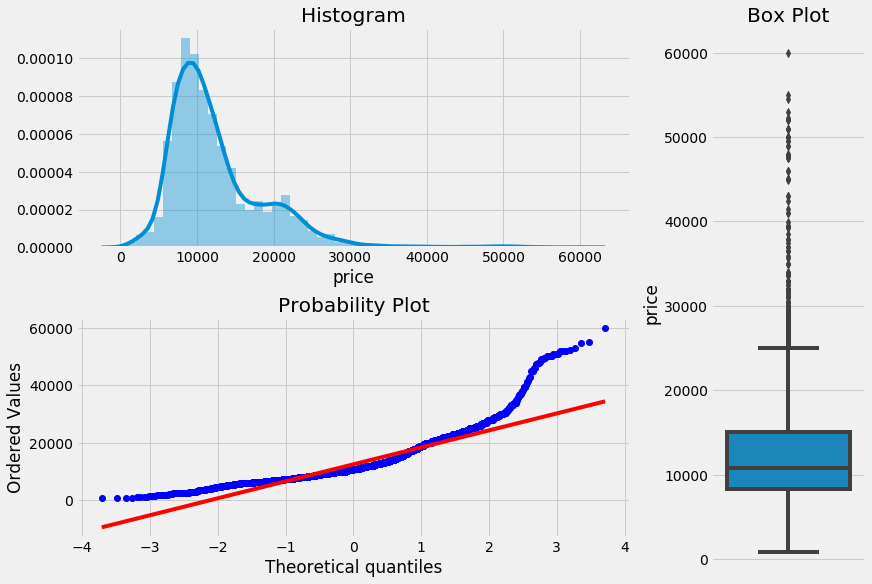

In [13]:
plotting_3_chart(data_onehot, 'price')
#skewness and kurtosis
print("Skewness: " + str(data_onehot['price'].skew()))
print("Kurtosis: " + str(data_onehot['price'].kurt()))

**Conclusions from EDA and Feature Engineering:**
* Based on the histogram, we can see that the price variable is fairly right skewed for Toyota vehicles. The center falls somewhere between £10,000 and £15,000, but since the histogram is asymmetrical, it is hard to tell where the center truly lies.
* Based on the qqplot, we can see that the data is right skewed based on the overall shape of the plot. In other words, since the plot is concave up and increasing, the price data is right skewed.
* Based on the Box Plot, the median price is about £11,000. Yet again, we can see that the data is right skewed because of the number of outliers greater than the data within the accepted range. Also, the distance between the median and the maximum appears to be greater than the distance between the median and the minimum. This is significant because if the same amount of data falls within those two distances, the side with the greater distance is the side of the skewness.
* The skewness and kurtosis add quantitative measures for the conclusions made above, contributing to the conclusions already made.

## Changing all columns into numeric columns

The `model`, `transmission`, and `fuelType` columns need to be changed into numbers in order to fit in the model. Let's do that.

In [14]:
# Turn non-numeric variables into numbers
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

In [15]:
# Check to see if the non-numeric variables were actually changed
pd.api.types.is_string_dtype(df_tmp["model"])

False

Now that all of our columns are numeric, we can create a model.

## Modeling

This map was used to choose the best model:
* https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [16]:
# First, let's try the Ridge Regression model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Create the data
X = df_tmp.drop("price", axis=1)
y = df_tmp["price"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the Ridge model on test data
model.score(X_test, y_test)

0.7848304974932305

In [17]:
# Next let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = df_tmp.drop("price", axis=1)
y = df_tmp["price"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instatiate Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test, y_test)

0.9644037273649287

In [18]:
# Compared to the Ridge() model
model.score(X_test, y_test)

0.7848304974932305

**The RandomForestRegressor( ) model has a much higher score. We will be using that one.**

## Regression Evaluation Metrics

In [19]:
# Regression evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = df_tmp.drop("price", axis=1)
y = df_tmp["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions using our regression model
y_preds = model.predict(X_test)

# Evaluate the regression model
print("Regression model metrics on the test set")
print(f"R^2: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression model metrics on the test set
R^2: 0.9644037273649287
MAE: 812.1212051510762
MSE: 1514844.513087954


## Putting it All Together

In [37]:
df = pd.read_csv("/Users/joey/Downloads/datasets_750216_1305559_toyota.csv")
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0
...,...,...,...,...,...,...,...,...,...
6733,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


In [38]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [22]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

What we have to do:
1. Turn the data into numbers
2. Build a model

In [83]:
# Getting data ready
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Turn non-numeric variables into numbers
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers and add +1
        df[label] = pd.Categorical(content).codes+1

# Split data
X = df.drop("price", axis=1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define model
model = RandomForestRegressor(n_estimators=100)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

# Create a dataframe for my sister's car and predict the price (£)
sister_car = pd.DataFrame([[13.0, 2017.0, 1.0, 44591.0, 4.0, 671, 25, 2.5]],
             columns=["model","year","transmission","mileage","fuelType","tax","mpg","engineSize"])
model.predict(sister_car)

array([19408.42])

## Conclusion

If my sister were in the (UK) market for a 2017 RAV4 again, according to the model, the proper price to ask for would be **£19,408.42**. After conversion to pounds, my sister paid a total of **£16,924.64**, which actually indicates she got a great deal on the purchase. Nice!